# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:blue">Módulo I - Dados Estruturados e Não Estruturados</span>


### <span style="color:blue">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:blue">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [2]:
# carregando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)

Considere a tabela com os dados a seguir

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento | Foto
 :------ |:--------- |:----- | --- | --- 
 joao@provider.com     | João | Oliveira | 1996 | foto1033.jpg
 bet89@hoster.net    | Elizabete | Costa Silva | 1989 | foto0010.jpg
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976 | foto2401.jpg
 
 De acordo com a definição de dados estruturados e não estruturados, esse conjunto de dados é
 
 <span style="color:green">(a) Estruturado</span><br>
 (b) Não-estruturado<br>
 (c) Estruturado quando não consideramos o atributo *Foto*<br>
 (d) Estruturado quando não consideramos os atributos *username* e *Foto*<br>
 
 Justifique sua escolha.<br>
 
 ---
 
 <font color="green">Resposta: </font>Todos os campos e registros são endereçáveis e passíveis de armazenamento e recuperação.

---

### Exercício 2)

São características de dados não-estruturados

 (a) Facilidade de <s>versionamento</s>, baixo controle de coleta, e inexistência de formato bem definido para armazenamento<br>
<font color="green"> (b) Alta dimensionalidade, armazenamento em formato binário ou textual, e alta flexibilidade na coleta dos dados</font><br>
 (c) Alta redundância, e informações <s>fáceis de recuperar</s> a partir dos dados brutos<br>
 (d) <s>Inexistência de esquema de armazenamento e recuperação, e alto controle de integridade dos dados</s><br>



---
### Exercício 3)

Analise a base de dados "Exercicio", que contém 100 linhas. Em particular vamos estudar os atributos "Religion", "Profession" e "Year of Birth", que possuem dados faltantes. Explore esses atributos utilizando estatística descritiva com `describe()` e buscando pelo conjunto de valores únicos com `unique()`.

Após isso, responda as **questões I, II, III e IV** abaixo. OBS: Para responder às questões com maior segurança, pode ser necessário explorar a base de dados com outras ferramentas, gráficos e buscas.


In [7]:
data_m = pd.read_csv("./dados/TACTD-01-Missing.csv")

# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Religion
print(data_m['Religion'].describe())
print()
print(data_m['Religion'].unique())

count            98
unique            3
top       Christian
freq             96
Name: Religion, dtype: object

['Christian' '---' nan 'x']


In [9]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Profession
print(data_m['Profession'].describe())
print()
print(data_m['Profession'].unique())

count        98
unique        2
top       Nurse
freq         92
Name: Profession, dtype: object

['Nurse' 'X' nan]


In [25]:
#### para investigar a questao da origem dos dados faltantes, exiba as linhas com dados faltantes
print(data_m.isnull().sum())

print("\n\nDados Faltantes\t'Year of Birth'\n")
print(data_m [data_m['Year of Birth'].isnull() ])

print("\n\nDados Faltantes\t'Religion'\n")
print(data_m [data_m['Religion'].isnull() ])

print("\n\nDados Faltantes\t'Profession'\n")
print(data_m [data_m['Profession'].isnull() ])

Name                 0
Sex                  0
Year of Birth       21
Country of Birth     0
Religion             2
City                 0
Profession           2
dtype: int64


Dados Faltantes	'Year of Birth'

                 Name Sex  Year of Birth Country of Birth   Religion  \
3      Desiree Dardar   F            NaN              USA  Christian   
8        Lora Lemoine   F            NaN          England  Christian   
20   Willene Wolfgram   F            NaN              USA        NaN   
21       Marcos Magro   M            NaN           Brazil  Christian   
24       Herta Hatley   F            NaN              USA  Christian   
32      Esther Morgan   F            NaN        Australia  Christian   
36      Gabriel Paiva   M            NaN         Portugal  Christian   
50  Lorraine Richards   F            NaN           Brazil  Christian   
52       Susie Hodges   F            NaN           Brazil  Christian   
53      Pablo Alvarez   M            NaN           Mexico  Christian   

In [27]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Year of Birth
data_m['Year of Birth'].describe()

count      79.000000
mean     1974.177215
std         8.622807
min      1960.000000
25%      1967.000000
50%      1974.000000
75%      1981.500000
max      1998.000000
Name: Year of Birth, dtype: float64

<AxesSubplot:>

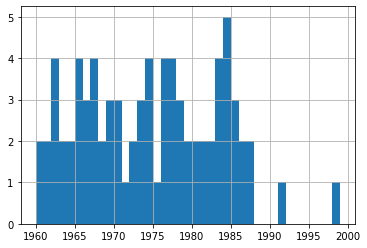

In [29]:
#### investigue como os anos estão distribuídos
min_year = data_m['Year of Birth'].describe()['min']
max_year = data_m['Year of Birth'].describe()['max']

data_m['Year of Birth'].hist(bins=range(int(min_year),int(max_year)+2))

#### Exercício 3, questão I

Sobre o atributo Religion, qual das alternativas é mais plausível:

(a) há 2 dados faltantes, do tipo completamente aleatório<br>
(b) há 4 dados faltantes, podendo ser do tipo completamente aleatório (MCAR) ou não-aleatório<br>
(c) há 2 dados faltantes, do tipo não-aleatório<br>
(d) há 4 dados faltantes, do tipo (condicionalmente) aleatório<br>


#### Exercício 3, questão II

Sobre o atributo Profession, é possível dizer que:

(a) há 6 dados errôneos<br>
(b) há 2 dados faltantes<br>
(c) há 2 dados faltantes e 5 dados errôneos<br>
(d) há 8 dados faltantes<br>

#### Exercício 3, questão III

Sobre o atributo Profession, é possível dizer que os dados faltantes são:

(a) uma mistura dos tipos (condicionalmente) aleatório (MAR) e completamente aleatório (MCAR)<br>
(b) unicamente do tipo (condicionalmente) aleatório (MAR) <br>
(b) unicamente do tipo completamente aleatório (MCAR) <br>
(d) uma mistura dos tipos não aleatório e (condicionalmente) aleatório (MAR)<br>

#### Exercício 3, questão IV

Sobre o atributo Year of Birth, de acordo com a análise exploratória, qual(is) tipo(s) de dados faltantes são mais plausíveis (escolha apenas uma opcao abaixo):

(a) uma mistura dos tipos (condicionalmente) aleatório (MAR) e completamente aleatório (MCAR)<br>
(b) do tipo (condicionalmente) aleatório (MAR) <br>
(c) do tipo completamente aleatório (MCAR) <br>
(d) do tipo não aleatório<br>


---

### Exercício 4)

Analise a base de dados "BCE_Outliers_Err_Desbal", utilizada nas aulas. Utilize `boxplot()` e `hist()` para explorar cada atributo (exceto Weight, já analisado na aula), mas também codifique outras buscas que achar necessário para responder às  **questões I e II**  abaixo.

In [30]:
data2 = pd.read_csv("./dados/TACTD_01-BCE_Outliers_Err_Desbal.csv") 

In [34]:
print(data2.columns)
print("\n",data2.head())

Index(['Sex', 'Weight', 'Gestational age', 'Month', 'Year'], dtype='object')

   Sex  Weight  Gestational age  Month  Year
0   F    3490               38     11  2016
1   M    3650               39     11  2016
2   M    2740               34     11  2016
3   F    3380               39     12  2016
4   F    3820               38     12  2016


<AxesSubplot:>

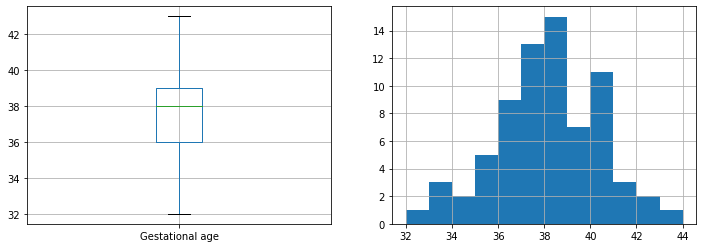

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(121); data2.boxplot('Gestational age')
plt.subplot(122); data2['Gestational age'].hist(bins=range(min(data2['Gestational age']),max(data2['Gestational age'])+2))

#### Exercício 4, questão I

Procure por um **outlier** não comentado na aula. Esse outlier é um 

(a) idade gestacional com valor muito alto<br>
(b) idade gestacional com valor muito baixo<br>
(c) ano com valor muito alto<br>
(d) ano com valor muito baixo<br>



#### Exercício 4, questão II

Como interpretar o outlier encontrado?

(a) outlier global e dado errôneo resultado de problema na coleta de dados, deve ser removido<br>
(b) outlier global, mas não deve ser modificado<br>
(c) outlier global e dado errôneo, podendo ser corrigido<br>
(d) outlier condicional, deve ser removido<br>


---

### Exercício 5)

Considere as informações dadas a seguir:

<img src="./imagens/foto_tabela2.jpg" alt="tabela" width="760"/>

Poderíamos dizer que os dados disponíveis nesse arquivo exibido são do tipo: 

(a) não estruturado<br>
(b) estruturado

Justifique sua resposta.

---
## Exercício 6) 

Analise a base de dados "Exercicio" novamente. Agora vamos buscar por problemas dos tipos errôneos e outliers no atributo "Years of Experience":


In [12]:
data_m = pd.read_csv("./dados/TACTD-01-Exercicio.csv")


#### Exercício 6, questão I

Escolha a alternativa que melhor descreve os problemas no atributo:

(a) possui ao menos um dado errôneo <br>
(b) possui outliers contextuais relacionados ao ano de nascimento<br>
(c) possui outliers conjuntos relacionados ao ano de nascimento<br>
(d) possui ao menos 4 outliers globais<br>


#### Exercício 6, questão II

Assuma que precisamos construir um modelo para tentar compreender a correlação entre o sexo e país de origem com a quantidade de anos de experiência. 

Considerando o problema encontrado na questão anterior, e sabendo que há dados faltantes mas para os quais não conhecemos o tipo, como é mais adequado proceder?

(a) não é necessário nenhum tratamento<br>
(b) é preciso remover os outliers e desconsiderar dados faltantes<br>
(c) é preciso remover os dados errôneos e desconsiderar os dados faltantes na análise<br>
(d) é preciso preencher os dados faltantes<br>